# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.rebalancing import *

<Axes: title={'center': 'Current portfolio weights'}>

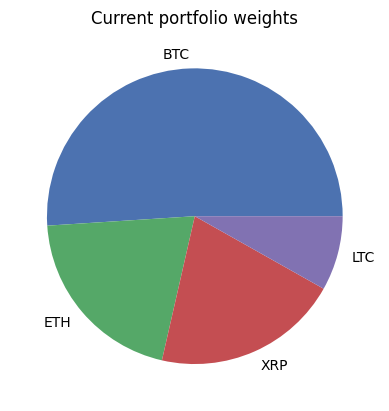

In [2]:
# Current portfolio
portfolio = pd.Series([0.05, 0.2, 400, 0.8], index=['BTC', 'ETH', 'XRP', 'LTC'])

prices = pd.Series([10000, 1000, 0.5, 100], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Plot weights of the portfolio, based on the current prices
weights = portfolio * prices
weights.plot(kind='pie', title='Current portfolio weights')

# Rebalance Simulation

In [7]:
new_target_weights = pd.Series([0.2, 0.2, 0.2, 0.2], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Weight Assets is a list of tuple such that (min, ideal, max). For now, min and max are ± 10% of ideal
weight_assets = [(
    new_target_weights[i] - 0.1 * new_target_weights[i],
    new_target_weights[i],
    new_target_weights[i] + 0.1 * new_target_weights[i]
) for i in new_target_weights.index]

# Order size Assets is a list of tuple such that (minOrderSize, maxOrderSize). For now, min and max are [0, 10000]
order_size_assets = [(0, 0.2) for i in new_target_weights.index]

orders = totalOrders(
    amountAsset=np.array(portfolio),
    priceAsset=np.array(prices),
    orderSizeAssets=np.array(order_size_assets),
    weightAssets=np.array(weight_assets),
    TBDAmount=0
)

orders

array([1422.,   79.,   79.,  679.])